In [1]:
import numpy as np
from ebm_utils.purify_utils import purify
# Requires installing https://github.com/blengerich/gam_purification by:
# pip install git+https://github.com/blengerich/gam_purification.git

In [2]:
from interpret.glassbox import ExplainableBoostingRegressor as ebr
from interpret import show

In [3]:
X = np.random.uniform(0, 1, size=(1000, 2))
Y = X[:, 0]*X[:, 1]

In [4]:
ebm = ebr(interactions=2)
ebm.fit(X, Y)
ebm_global = ebm.explain_global()
results_empirical = purify(ebm_global, use_density=True, dataset_name="toy",
                 move_name="empirical", X_train=X, X_means=np.mean(X, axis=0), X_stds=np.std(X, axis=0),
                 laplace=0, should_transpose=False)
results_smoothed = purify(ebm_global, use_density=True, dataset_name="toy",
                 move_name="smoothed", X_train=X, X_means=np.mean(X, axis=0), X_stds=np.std(X, axis=0),
                 laplace=10, should_transpose=False)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import ImageGrid

def plot_interaction(results):
    fig = plt.figure()
    grid = ImageGrid(fig, 111,
                     nrows_ncols=(1, 2),
                     share_all=True,
                     cbar_location='right',
                     cbar_mode='single',
                     cbar_size='7%',
                     cbar_pad=0.15,
                     axes_pad=0.1)

    extent = (ebm_global.data(0)['names'][0],
              ebm_global.data(0)['names'][-1],
              ebm_global.data(1)['names'][0],
              ebm_global.data(1)['names'][-1])

    aspect = float(extent[3] - extent[2]) / float(extent[1] - extent[0])
    aspect = 1/aspect

    im = grid[0].imshow(results['pairs'][(0, 1)], aspect=aspect, origin='lower',
                        interpolation='none', extent=extent)
    im = grid[1].imshow(results['pairs_moved'][(0, 1)], aspect=aspect, origin='lower',
                        interpolation='none', extent=extent)

    # Colorbar
    ax = grid[-1]
    ax.cax.colorbar(im)
    ax.cax.toggle_label(True)

    grid[0].set_ylabel("X_2", fontsize=22)
    grid[0].set_xlabel("X_1", fontsize=22)
    grid[1].set_xlabel("X_1", fontsize=22)
    grid[0].tick_params(axis='both', which='major', labelsize=16)
    grid[0].tick_params(axis='both', which='minor', labelsize=12)
    grid[1].tick_params(axis='both', which='major', labelsize=16)
    grid[1].tick_params(axis='both', which='minor', labelsize=12)
    ax.cax.tick_params(axis='both', which='major', labelsize=16)
    ax.cax.tick_params(axis='both', which='minor', labelsize=12)
    grid[0].set_title("Before Purification")
    grid[1].set_title("After Purification")
    plt.show()

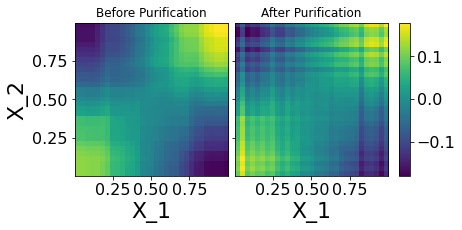

In [6]:
# Purify using the empirical density -- bumpy.
plot_interaction(results_empirical)

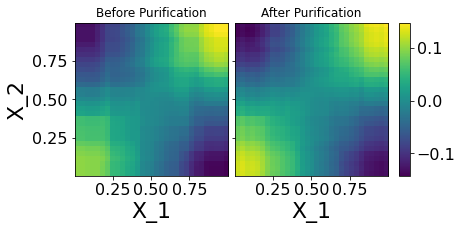

In [7]:
# Purify using a Laplacian-smoothed version of the empirical density.
plot_interaction(results_smoothed)

In [8]:
# Notice that these purified pairwise interaction effects look like "XOR",
# even though the original function was multiplication.